# Introduction

Data analysis tasks involve reading data stored in files on disks, servers in the cloud, or recorded by sensors. Also, we need to save the results of our analysis or datasets we have generated to files. 

There are a range of data types (e.g. string / text, numeric, datetime) and ways of characterising data such as tabular data, images and arrays, and spatial and non-spatial data. This necessitates storing data with different file formats. It's important to be able to read and write data from and to different file formats into and out of Python data structures that we can analyse in our programs. 

There are costs involved in storing and transferring data. These can be time costs associated with the time taken to read data from disk into the computer's memory or transferring data from one computer to another over a network. Or, they can be financial costs associated with storing the data (the cost of hard drives increases with storage capacity and cloud storage providers charge by the byte).

The term big data refers to the increasing volume, variety, and velocity of data. Larger and more diverse datasets are being generated more quickly. To be able to handle big data it is important to select appropriate file formats for efficient storage and reading / writing (or input / output - I/O).

A solid understanding of how to read and write different types of data from and to files is a key skill for data analysis. This week's lab will build these skills and provide an introduction to:

* files, directories, and data storage
* reading and writing files in Python
* tabular, image, and geospatial file formats
* specialist file formats for the web, big data, and cloud computing
* selecting different data formats for specific analysis or storage tasks

Let's start with a simple program to open a CSV file, read some data from it into memory, and then close the connection to the file.

In [106]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import rasterio.plot
import json
import os
import folium

In [107]:
# path to csv file
elev_csv_path = os.path.join(os.getcwd(), "data", "week-2", "week-2-bf66-elevation.csv")
print("path to elevation csv file:", elev_csv_path)

# open the file and read the first 1000 characters
f = open(elev_csv_path, "r", encoding="utf-8")
read_data = f.read()
f.close()

print("")
print("The first 1000 characters of the csv file area:")
print(read_data[0:1000])

path to elevation csv file: /home/jovyan/work/data/week-2/week-2-bf66-elevation.csv

The first 1000 characters of the csv file area:
Northing,Easting,Lat,Lon,Elevation
6503882.129,545428.0052,-31.59926178,117.4788733,268.92
6503806.024,545427.6719,-31.59994843,117.4788733,265.908
6503881.794,545504.4826,-31.59926178,117.4796795,268.171
6503805.688,545504.1488,-31.59994843,117.4796795,265.413
6503729.582,545503.8149,-31.60063507,117.4796795,263.08
6503653.477,545503.481,-31.60132172,117.4796795,260.739
6504185.881,545582.2978,-31.5965152,117.4804856,273.014
6504109.775,545581.9634,-31.59720185,117.4804856,273.273
6504033.67,545581.629,-31.59788849,117.4804856,273.896
6503957.564,545581.2946,-31.59857514,117.4804856,272.369
6503881.458,545580.9601,-31.59926178,117.4804856,268.96
6503805.352,545580.6257,-31.59994843,117.4804856,264.807
6503729.246,545580.2913,-31.60063507,117.4804856,262.857
6503653.141,545579.9568,-31.60132172,117.4804856,260.894
6504337.756,545659.4474,-31.59514191,117.

## Files and I/O

### Files

A file is data that is stored on a disk. Data in files is stored as a sequence bytes in binary format (values of zero or one).

![](https://github.com/data-analysis-3300-3003/figs/raw/main/week-2-file-storage.jpg)

#### Binary

A binary number is represented using only the digits 1 or 0. The binary number system is a base-2 number system (as it has only two symbols). 

The decimal number `0` in binary is `0`:

$0 = (0 \cdot 2^{0})$

The decimal number `1` in binary is `1`:

$1 = (1 \cdot 2^{0})$

The decimal number `2` in binary is `10`:

$2 = (1 \cdot 2^{1}) + (0 \cdot 2^{0})$

The decimal number `3` in binary is `11`:

$3 = (1 \cdot 2^{1}) + (1 \cdot 2^{0})$

The decimal number `4` in binary is `100`:

$4 = (1 \cdot 2^{2}) + (0 \cdot 2^{1}) + (0 \cdot 2^{0})$

You don't need to know the details of the binary number system here, but the key things to take away are:

* numbers are stored in binary using the digits 1 or 0
* larger numbers require more binary digits
* larger numbers, therefore, require more storage space

There are plenty of resources online to learn more about number systems. This is a short article on <a href="https://www.w3schools.com/ai/ai_history_numbers.asp" target="_blank">The History of Numbers</a>.

**Bits**

A single binary digit is a bit. Looking at the pattern above we can store the numbers 0 and 1 using a 1-bit binary number. We can store the numbers 2 and 3 using a 2-bit binary number. We can store the number 4 using a 3-bit binary number. For every extra bit we double the numbers that can be stored in binary. 

* 1 bits = 2 numbers (0 and 1)
* 2 bits = 4 numbers (0 to 3)
* 3 bits = 8 numbers (0 to 7)
* 4 bits = 16 numbers (0 to 15)
* 5 bits = 32 numbers (0 to 31)
* 6 bits = 64 numbers (0 to 63)
* 7 bits = 128 numbers (0 to 128)
* 8 bits = 256 numbers (0 to 255)

**Bytes**

A byte is an 8-bit binary number. With a single byte we can represent 256 different numbers. Computer storage is measured in bytes: 

* 1 Kilobyte (KB) is about 1,000 bytes.
* 1 Megabyte (MB) is about 1,000,000 bytes.
* 1 Gigabyte (GB) is about 1,000,000,000 bytes.

A greyscale image file can store each pixel's colour as an 8-bit number or as a single byte. Black is represented as the number 0 (00000000), white is the number 255 (11111111), and shades of grey are intermediate numbers (00000001 to 11111110). 

If this greyscale image has 100x100 pixels (10,000 pixels), how many bytes of storage does this image require?

$10000 bytes = 10000 pixels \cdot 1 byte$ as each pixel requires 1 byte of storage.

Generally, a common text character such as upper and lower case letters (A-Z, a-z) and symbols (!, @, # etc.) requires a byte of storage. The CSV file we read above stores text characters. We can use the `os.stats()` function to inspect the stats of this file in storage. Let's pass the path to the `week-2-bf66-elevation.csv` file into the `os.stats()` function and see how many bytes are required to store this file.

In [108]:
elev_csv_path = os.path.join(os.getcwd(), "data", "week-2", "week-2-bf66-elevation.csv")
file_stats = os.stat(elev_csv_path)
print("File Size in Bytes is:",  file_stats.st_size)

File Size in Bytes is: 23845


## File formats

A file format describes how data is encoded as binary sequences in files (sequences of 1 and 0 digits). The filename's extension indicates the file format used (e.g. .jpg is a JPEG file, .tif is a TIFF or GeoTIFF file, .csv is a CSV file). Some file formats also include a header or magic number inside the file that indicates what the file format is. The header can also include some metadata information about the file. 

![](https://github.com/data-analysis-3300-3003/figs/raw/main/week-2-file-formats.jpg)

A Portable Network Graphics (<a href="" target="_blank">PNG</a>) file is a common file format for storing image data. It is identified by a .png ending and consists of sections of bytes on disk arranged as:

1. PNG signature including a magic number for the start of the file and a PNG file identifier.
2. Image header with image metadata such as the size of the image.
3. Image data.
4. Image end to indicate the end of the PNG file on disk.

![](https://github.com/data-analysis-3300-3003/figs/raw/main/week-2-png-format.jpg)

Different file formats encode data in different ways, and, thus, have different strengths and weaknesses. Some file formats prioritise efficient storage (compression) of data on disk (small file sizes and quick transfer), other prioritise quick read and writing of data, and others prioritise cross-platform compatibility or interpretation. 

The various file formats for storing vector geospatial data provide a good illustration of how different formats store the same data but in ways that are better suited for different applications and uses. This is discussed <a href="https://macwright.com/2022/05/30/new-formats.html" target="_blank">here</a> and <a href="http://switchfromshapefile.org/" target="_blank">here</a>.

Many of you will have used shapefiles as a format for storing vector geospatial data. A strength of shapefiles is the range of software applications that can read and write data from and to them. However, they have drawbacks which mean they're not suited to some use cases:

* Multifile format which makes data handling harder (you need a .shp, .shx, .prj, and .dbf file).
* File size is limited to 2 GB which is prohibits their use for storing large datasets.
* Attribute names are limited to 10 characters which can preclude using descriptive attribute and column names.
* Each shapefile can only store one type of geometry (point or line or polygon) which prohibits representing complex geographic features in a single file.
* No null value which can introduce complications for handling missing data.
* Data types are limited to 256 characters which precludes storing large numbers / text strings.

It is important to be aware of the characteristics of particular file formats and what their limits or benefits mean for your analysis. A simple example of why this is important: *we've processed several harvester yield datasets from different fields into a single dataset and want to save this dataset to file. If this dataset is larger than 2GB and we try and save to a shapefile there will be data loss.*

## Directories and file systems

Files are organised within a hierarchy of directories and sub-directories (or folders) in a computer system. We're working in a Linux environment so the directory hierachy starts at the root denoted by `/`. Sub-directories are separated by `/`.

A program has a current working directory which is its current location within the directory hierarchy.

We can get the current working directory by calling the `os.getcwd()` function.

In [109]:
os.getcwd()

'/home/jovyan/work'

We can get a list of files and sub-directories within the current working directory by calling the `os.listdir()` function.

In [110]:
os.listdir()

['.DS_Store',
 '.ipynb_checkpoints',
 'data',
 'lab-1.ipynb',
 'lab-2.ipynb',
 'write_demo.csv']

A path describes the location of a file within the computer system's directory structure. We can create paths to files using the `os.path.join()` function. We pass in string data representing sub-directories and filenames and the `os.path.join()` function creates a file path. 

Let's get the file path for this notebook file: `lab-2.ipynb`.

In [111]:
os.path.join(os.getcwd(), "lab-2.ipynb")

'/home/jovyan/work/lab-2.ipynb'

## Files in Python

In Python, it is possible to read and write files in text and binary modes.

### Text mode

Text mode involves reading and writing string data from and to the file. 

A text file contains encoded characters. ASCII and Unicode are character sets that define how characters (e.g. 1, 2, 3, 66, A, b, !) are encoded in binary (sequences of 1 and 0 digits) in a file. 

A character set translates characters into numbers and an encoding translates numbers into binary.

#### ASCII

ASCII stands for the American Standard Code for Information Interchange and has encodings for 128 English characters, numbers, and some special characters. ASCII characters are encoded using 7-bits. You can see the full ASCII character set <a href="https://www.w3schools.com/charsets/ref_html_ascii.asp" target="_blank">here</a>.

In ASCII, uppercase G is represented by the number 71, uppercase I is represented by the number 73, and uppcase S is represented by the number 83.

Thus, GIS in ASCII is written as `71 73 83` in its numeric representation and `01000111 01001001 01010011` in its binary representation (i.e. how it would be stored in a file).

#### Unicode

Unicode is a more modern and comprehensive character set of text symbols covering modern and ancient languages. Common encodings of the Unicode character set are UTF-8 and UTF-16. The Unicode character set includes over 1,000,000 characters and aims to be a universal system for representing and storing text in computer systems.

Unicode characters can be encoded in UTF-8 using one to four bytes. More common symbols (e.g. the ASCII character set) are encoded using one byte for efficient storage. 

The Python <a href="https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files" target="_blank">docs</a> suggest UTF-8 is the modern de-facto standard so it is often the default encoding or a good one to choose if you are not sure how your data is encoded.

### Binary mode

Reading files in binary mode does not assume that specific bytes represent human readable characters. When reading files in binary mode, sequences of bytes are read from the file into Python bytes objects in memory. Images such as JPEG files would be read in binary mode. 

To be clear, both text and binary data is stored in binary format on disks. However, when reading in text data the binary data on disk is converted to text characters based on the encoding scheme used and read into string objects. When reading data in binary mode the binary data is read straight into memory as bytes objects. Reading and writing data in text mode will be slower because of the encoding overhead.


### Opening files

The `open()` function opens a connection to a file on disk, or creates a new file if it does not exist, and returns a `file` object. 

Typically, `open()` is called by specifying a filename, mode, and encoding as arguments: `open(filename, mode, encoding)`.

* **filename**: the path and filename of the file to be opened.
* **mode**: the mode to open the connection to file in. To open files in text mode use `r` for read only, `w` for write only, `a` for appending data to the file, `r+` for reading and writing. To open files in binary mode use `rb` for read only, `wb` for write only, and `rb+` for reading and writing.
* **the default is to open connections in text mode - be careful if you are opening a connection to a file that is not text data.**
* **encoding**: the encoding of the data in the file.

Let's open up a connection to a CSV file and explore the file object that's returned.

In [112]:
# open a connection to a csv file
# path to csv file
elev_csv_path = os.path.join(os.getcwd(), "data", "week-2", "week-2-bf66-elevation.csv")

# open the file 
f = open(elev_csv_path, "r", encoding="utf-8")

We've opened a connection to a CSV file in read mode `"r"` and with a `utf-8` encoding. This has returned to us `f`, a variable pointing to a `file` object. 

What kind of object is `f` pointing to?

In [113]:
type(f)

_io.TextIOWrapper

Variable `f` is pointing at a `file` object, or, more specifically, an `_io.TextIOWrapper` type object. The `IO` stands for input / output which is another way of saying reading and writing data. The `Text` refers to the fact that `f` will be able to read data to string Python objects or write data from string Python objects to binary in files (i.e. it's reading in text mode). The conversion from string to binary and binary to string is determined by the encoding (e.g. UTF-8 or ASCII). 

The `file` object `f` is a connection to a file and it provides the methods to read (write) data from (to) this file via the connection.  

### Reading files

A read operation will copy bytes from the file on disk to the computer's memory. The `file` object,`f`, has the `read()` and `readline()` methods. 

The `read(size=n)` method in text mode will read `n` characters from the file. If `n` is omitted or is a negative number the `read()` function will read all of the characters in the file. 

The `readline()` will read until a newline in the text file. Text files have newline characters that denote the end of a line. On Windows the newline character is `\r\n` and on Linux / MacOS it is `\n`. 

Let's test out the `read()` and `readline()` methods.

In [114]:
# read first 1000 characters from the csv file connected to by f
chars_1000 = f.read(1000)
print(chars_1000)

Northing,Easting,Lat,Lon,Elevation
6503882.129,545428.0052,-31.59926178,117.4788733,268.92
6503806.024,545427.6719,-31.59994843,117.4788733,265.908
6503881.794,545504.4826,-31.59926178,117.4796795,268.171
6503805.688,545504.1488,-31.59994843,117.4796795,265.413
6503729.582,545503.8149,-31.60063507,117.4796795,263.08
6503653.477,545503.481,-31.60132172,117.4796795,260.739
6504185.881,545582.2978,-31.5965152,117.4804856,273.014
6504109.775,545581.9634,-31.59720185,117.4804856,273.273
6504033.67,545581.629,-31.59788849,117.4804856,273.896
6503957.564,545581.2946,-31.59857514,117.4804856,272.369
6503881.458,545580.9601,-31.59926178,117.4804856,268.96
6503805.352,545580.6257,-31.59994843,117.4804856,264.807
6503729.246,545580.2913,-31.60063507,117.4804856,262.857
6503653.141,545579.9568,-31.60132172,117.4804856,260.894
6504337.756,545659.4474,-31.59514191,117.4812918,274.777
6504261.651,545659.1125,-31.59582856,117.4812918,273.813
6504185.545,545658.7775,-31.5965152,117.4812918,272.371
6504

In [115]:
# read the first 10 lines of the csv file 
for i in range(0, 10):
    print(f.readline())

109.439,545658.4425,-31.59720185,117.4812918,273.274

6504033.333,545658.1076,-31.59788849,117.4812918,272.729

6503957.227,545657.7726,-31.59857514,117.4812918,270.546

6503881.122,545657.4376,-31.59926178,117.4812918,267.788

6503805.016,545657.1026,-31.59994843,117.4812918,264.559

6503728.91,545656.7676,-31.60063507,117.4812918,262.08

6504641.842,545737.2702,-31.59239533,117.482098,273.551

6504565.737,545736.9348,-31.59308198,117.482098,273.001

6504489.631,545736.5993,-31.59376862,117.482098,274.043

6504413.525,545736.2638,-31.59445527,117.482098,274.396



You might notice that the call to `readline()` does not start with the row of column headers. This is because the `file` object `f` keeps a record of a position in the file up to where it has read bytes from. The call to `readline()` will start reading lines of characters from the file where the previous call to `read(1000)` finished. 

We can use the `tell()` method to see a `file` object's current position in a file.

In [116]:
print(f"current position in the file is {f.tell()}")

current position in the file is 1588


The reason that `read()` or `readline()` provide the option to read data in `n` characters at a time or line by line is to help you avoid reading in more data than can fit in your computer's memory. If you had a large file and called `read()` on it, without specifying the number of characters to read, it could fill up your memory.

As we're reading from the file in text mode, the binary data from the file should be converted to Python string objects. We can check this. 

In [117]:
type(chars_1000)

str

### Writing files

The `write()` method of the `file` object writes Python objects (e.g. strings) to files. The data will then be stored on disk in a specified format until it is read again by another program. 

When writing data in text mode Python string objects (characters) are encoded (e.g. using ASCII or UTF-8) and stored as bytes on the disk. 

Let's demonstrate a write operation by writing the 1000 characters stored in `chars_1000` to a new file. First, we need to open a connection to the new file in write mode and specify an encoding.

In [118]:
f2 = open("write_demo.csv", "w", encoding="utf-8")

Now, we can call the `write()` method of the `file` object `f2` and pass `write()` the variable `chars_1000` which points to 1000 characters stored as a string object. If the write is successful, it should return a number telling us how many characters were written (it should be 1000) and you should be able to see the file *write_demo.csv* in your current working directory.

In [119]:
f2.write(chars_1000)

1000

### Closing files

After you have finished reading or writing data from and to the file, it is important to `close()` the connection to the file. The `file` object's `close()` method does this. 

Once the `close()` method has been called on a `file` object it is no longer possible to read or write data from and to the file. This is important to prevent accidental data loss or corruption. 

We have two open file connections, let's close them.

In [120]:
f.close()
f2.close()

## Context managers 

Context managers - the "correct" way to read and write data from and to files in Python. 

Above we have gone through the process of opening connections to files, reading and writing data, and closing connections to files. However, there are lots of moving parts to this approach as you need to keep track of which connections are open to which files and to ensure you close connections when they are no longer needed. As applications grow and work with more data this can require handling many file connections which adds complexity and increases potential for mistakes / errors. Such mistakes / errors can result in data loss, corrupting files, or reduced security if file connections to private data are leaked. 

There are two "better" ways to read and write data in Python. The first is using context managers and the second is using methods and functions provided by packages (e.g. pandas `read_csv()` function). 

Let's open a file and read data from it using a context manager. A context manager ensures that connections to files are properly closed without explicitly having to code for it. To create a context, use the `with` statement. 

We've already demonstrated how to open, read, and write data in text mode from a CSV file. Let's use a context manager to demonstrate how to work with files in binary mode. Above we introduced the PNG file format for storing image data. We have a PNG file showing a Google Earth aerial image of the field we're working in. The first few bytes of the PNG file should be the PNG signature including a magic number for the start of the file and an ASCII representation of the letters PNG. 

In [121]:
png_file_path = os.path.join(os.getcwd(), "data", "week-2", "week-2-bf66-low-res.png")

with open(png_file_path, "rb") as f:
    print(f.read(1)) # read and print the first byte
    print(f.read(3)) # read and print the second, third, and fourth bytes

b'\x89'
b'PNG'


You will note that we opened a connection to the PNG file in `rb` mode. This indicates we are reading data in binary mode. Here, instead of reading in the data a character at a time (as we did when reading data in text mode) we are reading in `n` bytes of data. 

You will also note when printing the binary data that is read from the PNG file there is a `b` in front of the text. This indicates the data being printed is of bytes type. 

Finally, you will notice that we did not need to `close()` the file connection `f` as this is handled for us by working within the context of the `with` statement. 

This is what the data in the PNG file we have just been reading looks like. 

![Imagery (c) 2022 CNES | Airbus, Imagery (c) 2022 | Airbus, Landsat | Copernicus, Maxar Technologies, Map Data (c) 2022](https://github.com/data-analysis-3300-3003/figs/raw/main/week-2-bf66-low-res.png)

<!-- *Imagery (c) 2022 CNES | Airbus, Imagery (c) 2022 | Airbus, Landsat | Copernicus, Maxar Technologies, Map Data (c) 2022* -->

## Pandas I/O

Many Python packages provide functions and methods to read and write data that safely open and close connections to files. The pandas `read_csv()` function reads CSV data from disk into a pandas `DataFrame` object in a single line of code without us needing to explicitly close a connection to the file.

Let's read some canola yield data collected by a harvester and stored as a CSV file into our program using the pandas `read_csv()` function.

In [122]:
canola_yield_df = pd.read_csv(os.path.join(os.getcwd(), "data", "week-2", "week-2-bf66-canola-yield.csv"))
print(f"The shape of the canola yield DataFrame is {canola_yield_df.shape}")

The shape of the canola yield DataFrame is (80755, 8)


In [123]:
canola_yield_df.head()

,Unnamed: 0,Longitude,Latitude,Crop,Time,Variety,DryYield,Elevation
0,0,117.497719,-31.606760,5,11/11/2020 8:01,43Y23 RR,0.227,264.32
1,1,117.497693,-31.606743,5,11/11/2020 8:01,43Y23 RR,0.480,264.34
2,2,117.497671,-31.606733,5,11/11/2020 8:01,43Y23 RR,0.568,264.42
3,3,117.497659,-31.606738,5,11/11/2020 8:01,43Y23 RR,0.629,264.48
4,4,117.497646,-31.606742,5,11/11/2020 8:01,43Y23 RR,0.627,264.60


Pandas provides a range of convenient functions for reading and writing data - you can find a list of them <a href="https://pandas.pydata.org/docs/user_guide/io.html" target="_blank">here</a>.

## Parquet files

So far we have been working with data in CSV format. The CSV format has many strengths for storing tabular data including:

* many software applications provide tools to read and write CSV data.
* the data structure is relatively intuitive with human readable characters encoded in binary, data values (fields) comprise binary representations of characters and are separated by comma symbols (hence the name), and rows (records) are separated by newline symbols. 
* flexibility to choose different encodings of the text data.

However, CSV files require that each data value is stored even if there is lots of repetition. For example, if there is a column that denotes the field name or id, for every row in the table the field name or id value would be repeated. As datasets get large, this can cause CSV files to increase in size which has subsequent storage costs. 

An alternative file format for storing tabular is parquet. Parquet files are optimised for storage. This provides more efficient use of hard drives, cheaper cloud storage costs, and quicker transmission of data over the internet. 

Parquet files have several optimisations for storing tabular data. Where as CSV files are based around row storage, parquet files are based on column storage. 

![](https://github.com/data-analysis-3300-3003/figs/raw/main/week-2-parquet.jpg)

Parquet files can optimise storage of tabular data using **run length encoding** and **dictionary encoding**. 

Run length encoding is useful for reducing storage when there are runs of the same value within a column. For example, in the `canola_yield_df` `DataFrame` the values in the Crop column repeat. Instead of storing every value, we can store the two values: the value that repeats and the number of repetitions in the column (e.g. `(5, 80755)` - instead of storing the number 5 80,755 times as would be the case in a CSV file we can just store two numbers 5 and 80,755). Run length encoding is not suited for CSV files as the data is stored by row, and, often, within a row you'll have data of different types (e.g. string / text, numeric, and dates). This structure doesn't lend itself to encoding runs of the same value - repitition in tabular data generally runs down columns not across rows. 

Dictionary encoding is useful when we need to store large values (e.g. long names or large numbers). Instead of writing the large value repeatedly in the file a smaller value is written and there is a dictionary which acts as a look up table to correspond the small value to the actual large value. This means the large value only needs to be stored once.

For a single field, we have 80,755 records (rows) in the `DataFrame`. If we scaled up this analysis to work with data collected from harvesters across many fields in Western Australia we would quickly accumulate a large volume of data. At some stage we will hit issues with storing and transferring the data and it might be appropriate to switch from CSV to parquet files for data storage. 

In [124]:
canola_yield_df.to_parquet(os.path.join(os.getcwd(), "data", "week-2", "week-2-bf66-canola-yield.parquet"))

Let's compare the size of the CSV file storing the canola yield data and the parquet file we just saved. The parquet file should be much smaller.

In [125]:
file_stats_csv = os.stat(os.path.join(os.getcwd(), "data", "week-2", "week-2-bf66-canola-yield.csv"))
print("CSV file size in bytes is:",  file_stats_csv.st_size)
file_stats_parquet = os.stat(os.path.join(os.getcwd(), "data", "week-2", "week-2-bf66-canola-yield.parquet"))
print("Parquet file size in bytes is:",  file_stats_parquet.st_size)

CSV file size in bytes is: 5697740
Parquet file size in bytes is: 1549996


## Quick aside: geospatial data

Geospatial data is used to take geographic features or phenomenon and represent them as data in computer program or file. There are two main types of geospatial data: vector data and raster data.

There are two components to geospatial data:

* Positional information describing location, shape, and extent (e.g. an `(x, y)` coordinate pair representing the location of a weather station).
* Attribute information describing characteristics of the phenomenon or entity (e.g. a name:value pair recording the name of the weather station `name:'Perth Airport'`).

#### Raster data model

Raster data breaks the Earth's surface up into a grid of cells (pixels). Each pixel is assigned a value that corresponds to the geographic feature or phenomenon of interest. For example, pixels in a raster precipitation dataset would be assigned a numeric value that represents the amount of precipitation that fell at that location. Pixels in a land cover map would have an integer value that corresponds to a particular land cover class label. The values assigned to pixels in a raster dataset are the attribute information. 

![](https://github.com/data-analysis-3300-3003/figs/raw/main/week-2-raster-data-lc.png)

The size of the pixels relative to their position on the Earth's surface determines the spatial detail that can be resolved in the raster dataset. A land cover map with pixels that represent a 1 km x 1 km portion of the Earth's surface will not be able to identify features such as individual buildings.

The figure below shows the 2018 European Space Agency (ESA) Climate Change Initiative (CCI) land cover map. Each pixel represents a 300 m x 300 m area on the Earth’s land surface and a pixel can only represent a single land cover type. If you look at the bottom two zoomed in maps you can see some limitations of representing land cover using 300 m x 300 m spatial resolution raster data. The shape of land cover features are poorly represented by the “block-like” arrangement of pixels and there is variation in land cover within a single pixel (a mixed pixel problem).

![](https://github.com/data-analysis-3300-3003/figs/raw/main/week-2-raster-data-model.png)

#### Vector data model

Vector data uses point, line, or polygon geometries to represent geographic features. Point locations or the vertices in lines and polygons are represented using coordinate pairs. The coordinate pairs indicate where that feature is located on the Earth's surface (relative to an origin); longitude and latitute are commonly used as coordinate pairs. Vector data also stores non-spatial attribute information which describe characteristics of the geographic phenomenon or entity represented by the geometry feature.

![](https://github.com/data-analysis-3300-3003/figs/raw/main/week-2-vector-data.jpg)

## GeoJSON

So far we have been reading and writing non-spatial tabular data. Parquet and csv files are well suited for storing tabular data. 

However, there are different ways of structuring data, some datasets that don't lend themselves to tabular structures, and there are different uses of data files than storage on disk. 

JSON data (JavaScript Object Notation for its full name) is a widely used format for data interchange (exchanging data between programs, computers, clients, and servers). 

JSON represents data as key:value pairs enclosed within curly brackets `{}` (you might notice the similarity with Python's dictionary data structure). 

This is an example of JSON data:

```
{
    "title": "Introducing JSON",
    "url": "https://www.json.org/json-en.html"
}
```

The values in JSON data can include text (strings), numbers, arrays (lists), and nested JSON objects. Like the csv format, JSON is a text based format where human readable characters are encoded in binary using UTF-8 or UTF-16.

GeoJSON is an extension of the JSON format for storing and exchanging spatial data. It's widely used, but one of GeoJSON's uses is sending spatial data to web browsers to render as layers on web maps.

GeoJSON represents geographic features as vector data (points, lines, and polygon geometries) and can also store a non-spatial attribute information.
 
Spatial data in GeoJSON is are represented using `geometry` types which include:

`Point`

```
{"type": "Point", "coordinates": [1, 1]}
```

`LineString`

```
{"type": "LineString", "coordinates": [[1, 1], [2, 2]]}
```

`Polygon`

```
{"type": "Polygon", "coordinates": [[[1, 1], [2, 2], [1, 2], [1, 1]]]}
```

`Feature` types include attribute data as `properties` with `geometry` types.

```
{
    "type": "Feature",
    "geometry": {
        "type": "Point",
        "coordinates": [0, 0]
    }, 
    "properties": {
        "name": "Perth Airport"
    }
}
```

A `FeatureCollection` is a collection of `Feature`s.

```
{
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "geometry": {
                "type": "Point",
                "coordinates": [0, 0]
            }, 
            "properties": {
                "name": "Perth Airport"
            }
        },
        {
            "type": "Feature",
            "geometry": {
                "type": "Point",
                "coordinates": [10, 1]
            }, 
            "properties": {
                "name": "Broome Airport"
            }
        }
        
    ]
}
```

You can read <a href="https://macwright.com/2015/03/23/geojson-second-bite.html#featurecollection" target="_blank">More than you ever wanted to know about GeoJSON</a> for an excellant description of the GeoJSON format. 

Let's convert a CSV file with longitude, latitude, and elevation columns into GeoJSON format. First, let's read the CSV file in as a pandas `DataFrame`. 

In [126]:
elev_df = pd.read_csv(os.path.join(os.getcwd(), "data", "week-2", "week-2-bf66-elevation.csv"))
elev_df.head()

,Northing,Easting,Lat,Lon,Elevation
0,6503882.129,545428.0052,-31.599262,117.478873,268.920
1,6503806.024,545427.6719,-31.599948,117.478873,265.908
2,6503881.794,545504.4826,-31.599262,117.479680,268.171
3,6503805.688,545504.1488,-31.599948,117.479680,265.413
4,6503729.582,545503.8149,-31.600635,117.479680,263.080


Now, let's use the longtitude and latitude columns in the `DataFrame` to convert the elevation data into a GeoPandas `GeoDataFrame` - a tabular data structure based on the pandas `DataFrame` that includes a special `geometry` column for spatial data associated with each row. 

In [127]:
# Convert the elevation data to a spatial format
points = gpd.points_from_xy(elev_df["Lon"], elev_df["Lat"], crs="EPSG:4326")
elev_gdf = gpd.GeoDataFrame(elev_df, geometry=points)

Let's get the first two rows of the `GeoDataFrame` and convert them to GeoJSON format. `GeoDataFrame`s have a `to_json()` method which can be used to convert the data in the `GeoDataFrame` into a string object in GeoJSON format. 

In [128]:
# Get the first two rows of the elevation GeoDataFrame and convert to GeoJSON
elev_gdf_2 = elev_gdf.iloc[0:2, :]
elev_gdf_2

,Northing,Easting,Lat,Lon,Elevation,geometry
0,6503882.129,545428.0052,-31.599262,117.478873,268.920,POINT (117.47887 -31.59926)
1,6503806.024,545427.6719,-31.599948,117.478873,265.908,POINT (117.47887 -31.59995)


In [129]:
elev_geojson_2 = elev_gdf_2.to_json()
print(f"In Python, the GeoJSON data is stored as a {type(elev_geojson_2)} type object")
print("")
print(elev_geojson_2)

In Python, the GeoJSON data is stored as a <class 'str'> type object

{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"Northing": 6503882.129, "Easting": 545428.0052, "Lat": -31.59926178, "Lon": 117.4788733, "Elevation": 268.92}, "geometry": {"type": "Point", "coordinates": [117.4788733, -31.59926178]}}, {"id": "1", "type": "Feature", "properties": {"Northing": 6503806.024, "Easting": 545427.6719, "Lat": -31.59994843, "Lon": 117.4788733, "Elevation": 265.908}, "geometry": {"type": "Point", "coordinates": [117.4788733, -31.59994843]}}]}


In Python, the GeoJSON data that we have generated from our `GeoDataFrame` is stored as a string object. GeoJSON (and JSON) is a text based representation. This is similar to CSV files where human readable characters are encoded using a character set (GeoJSON and JSON use UTF-8 or UTF-16). However, unlike the CSV format where data has a tabular structure with records arranged by row the GeoJSON data is based around nested objects of key:value pairs.

As we have subsetted the first two rows of our `GeoDataFrame` and converted them to GeoJSON we have generated a `FeatureCollection` object with two `Feature`s. 

Each row in the `GeoDataFrame` is converted to a `Feature` and each `Feature` has the column values per row stored in a `properties` object - these are the non-spatial attributes associated with each `Point` feature. The spatial information is stored in a `geometry` object which contains two key:value pairs. The value associated with the `type` key tells us this is a `Point` geometry and the array value associated with `coordinates` key defines the location.

Compare the tabular display of the `GeoDataFrame` to the print of the GeoJSON to see how the non-spatial and spatial information in the table structure is converted to the GeoJSON nested format. 

We can save a `GeoDataFrame` to GeoJSON using the `GeoDataFrames` `to_file()` method and setting the driver argument to GeoJSON.

In [130]:
# Save the elevation GeoDataFrame to a GeoJSON file
elev_gdf.to_file(os.path.join(os.getcwd(), "data", "week-2", "week-2-bf66-elevation.geojson"), driver="GeoJSON")

Check the GeoJSON file has saved to the directory specified. As it is text data, if you click on it you should be able to inspect its format in a text editor. 

We can also add the GeoJSON data to a web map. JSON, and by extension GeoJSON, is a commonly used format for exchanging data with web applications and it can be parsed by web browsers to render information on web pages. 

In [131]:
# Convert the elevation data to GeoJSON 
elev_geojson = elev_gdf.to_json()

We can create a web map object using the `Map()` function from the folium package. Once we have created the `Map` object we can add GeoJSON layers to it.  

In [132]:
# Create a web map
m = folium.Map(location=[-31.59926, 117.47887], zoom_start=13, tiles='CartoDB positron')
folium.GeoJson(elev_geojson, name="elevation location").add_to(m)
m

This is a simple illustration of how can use GeoJSON to pass spatial data to web map applications. At this stage we have not styled the web map and it just shows the locations where elevation observations were recorded. 

## GeoTIFF

We have demonstrated how we can read and write tabular data and vector geospatial data from and to files. However, many geospatial datasets are based on the raster data model where values are assigned to pixels and pixels represent locations on the Earth's surface. 

A common source of raster data are remote sensing images captured by sensors on uncrewed aerial vehicles, aircraft, or satellites. Optical remote sensing images store the measured reflectance of light off the Earth's land surface in different wavelenghts. Raster remote sensing images are often stored using the <a href="https://gdal.org/drivers/raster/gtiff.html" target="_blank">GeoTIFF</a> format. 

A GeoTIFF file is based on the Tagged Image File Format (or .tiff file) which is a general format for storing image data. A TIFF file comprises:

* a **TIFF header** which includes 8 bytes that tell us that the file is in TIFF format and where in the file (what byte number / byte offset from 0) the first Image File Directory is stored.
* **Image File Directories** which contains image metadata, a pointer to where the image data is in the file (what byte number / byte offset from 0), and the location of the next Image File Directory if there is more than one image stored in the TIFF file. Metadata is stored as fields which comprise a TIFF tag and it's corresponding value.
* **Image Data** - the values associated with each pixel in the image. A single TIFF file can store multiple images.

![](https://github.com/data-analysis-3300-3003/figs/raw/main/week-2-geotiff.jpg)

GeoTIFF files include extra information (metadata) as tags which describe the coordinate reference system (CRS) of the image data (i.e. where on the Earth's surface the image data corresponds to), spatial resolution, no data values, and various other configurations described <a href="https://gdal.org/drivers/raster/gtiff.html" target="_blank">here</a>. 

GeoTIFF files can store multiple images (i.e. raster layers) in a single file. This makes them well suited for storing remote sensing image data where each raster layer corresponds to measured reflectance in particular wavelength. 

We can use the functions provided by the rasterio package to read and write raster data in Python. The rasterio package is based on GDAL which is a widely used software library for conversion of raster and vector geospatial data (behind the scenes GeoPandas which we used for working with vector data is also based on GDAL).

We can use rasterio to create a connection to raster data stored in a GeoTIFF file and use this connection read the raster data into a Python data structure. Rasterio reads raster data from GeoTIFF files on disk into NumPy `ndarray`s in memory. A NumPy `ndarray` is a multidimensional array of values so it is well suited to representing the pixelated and multi-layer nature of remote sensing images.

The GeoTIFF file *week-2-s2-summer-2020.tif* stores remote sensing data covering the same field that the elevation and canola yield data were collected from. The remote sensing data was captured by the European Space Agency's Sentinel-2 satellite; the Sentinel-2 sensor measures spectral reflectance in the visible, near infrared, and shortwave infrared wavelengths with a 10 m spatial resolution and 5-day revisit period. 

We need to use the `with` statement and context managers to `open()` connections to GeoTIFF files to `read()` raster data from them using rasterio. As we're using a context manager to handle connections to the file we don't need to remember to call `close()` on the `file` object.

In [133]:
# path the the GeoTIFF file
s2_path = os.path.join(os.getcwd(), "data", "week-2", "week-2-s2-summer-2020.tif")

# open the GeoTIFF file and read its metadata and image data
with rasterio.open(s2_path) as src:
    meta = src.meta
    rgb = src.read([4, 3, 2])
    red_band = src.read(4)
    green_band = src.read(3)
    blue_band = src.read(2)

The `file` object `src` is the connection to the GeoTIFF file and it has a `meta` property. The `meta` property stores metadata that describes the raster data in the GeoTIFF file. Let's explore this metadata.

In [134]:
print(meta)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 321, 'height': 232, 'count': 23, 'crs': CRS.from_epsg(4326), 'transform': Affine(8.983152841195215e-05, 0.0, 117.47574397627584,
       0.0, -8.983152841195215e-05, -31.58916713453456)}


From the `meta` object we can see the data type of the raster:

In [135]:
print(meta["dtype"])

float32


We can also see the dimensions of each raster band:

In [136]:
print(f"width: {meta['width']}") 
print(f"height: {meta['height']}") 

width: 321
height: 232


The `count` property of the `meta` object is the number of bands or raster layers in the GeoTIFF file:

In [137]:
print(f"number of bands: {meta['count']}")

number of bands: 23


And, we can see the coordinate reference system of the raster data:

In [138]:
print(meta["crs"])

EPSG:4326


### NumPy arrays

NumPy is a library used for scientific and numerical computing and is based around an N-dimensional `ndarray` object or `ndarray` object. An `ndarray` is a grid of elements of the same data type. The dimensions of a NumPy `ndarray` are called axes. NumPy `array`s can be created from sequences of values (e.g. stored in lists, tuples, other `ndarray`s).

We can create a simple 1-dimensional `ndarray` using the `array()` function.

In [139]:
# create a 1D ndarray
arr1d = np.array([1, 2, 3])
arr1d

array([1, 2, 3])

The rank (or number of dimensions) of a `ndarray` is the number of axes.

In [140]:
# the rank (ndim) of an ndarry is the number of axes 
print(f"the rank of the ndarray is {arr1d.ndim}")

the rank of the ndarray is 1


The `shape` of an `ndarray` tells us the size of each axis (how many elements are arranged along that axis).

In [141]:
# the shape of the ndarray 
print(f"the shape of the ndarray is {arr1d.shape}")

the shape of the ndarray is (3,)


A `ndarray` with 2-dimensions is a matrix with rows arranged on the 0 axis and columns arranged on the 1 axis. 

In [142]:
# create a 2D ndarray
arr2d = np.array([[1, 2, 3], [4, 5, 6]])
arr2d

array([[1, 2, 3],
       [4, 5, 6]])

The `ndarray` pointed to by `arr2d` is a 2 x 3 matrix of numeric values. We can check this. 

In [143]:
print(f"the rank of the ndarray is {arr2d.ndim}")
print(f"the shape of the ndarray is {arr2d.shape}")

the rank of the ndarray is 2
the shape of the ndarray is (2, 3)


`ndarray`s can be multidimensional. The can have more than two dimensions. Remote sensing images typically comprise multiple 2-dimensional arrays with each array corresponding to a raster of reflectance measured in a particular wavelength. This 3-dimensional raster data structure can be represented as a NumPy `ndarray` with the bands dimension on axis 0 (each band is a raster for a given wavelength), rows (height of each raster) on axis 1, and columns (width of each raster) on axis 2. 

Let's create a `ndarray` with 3-dimensions. 

In [144]:
# create a 3D ndarray
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [145]:
print(f"the rank of the ndarray is {arr3d.ndim}")
print(f"the shape of the ndarray is {arr3d.shape}")

the rank of the ndarray is 3
the shape of the ndarray is (2, 2, 3)


The concept of N-dimensional arrays can be extended further. For example, a 4-dimensional `ndarray` could store a sequence of 3-dimensional `ndarray`s where the fourth dimension is time and the object represents remote sensing images captured across multiple dates. 

### Visualising raster data

We can use the <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html" target="_blank">imshow()</a> function from the matplotlib package to render data in NumPy `ndarray`s as an image. The `imshow()` function expects a NumPy `ndarray` of raster values to display and a colour map (`cmap`) that relates raster pixel values to a colour on the computer screen. 

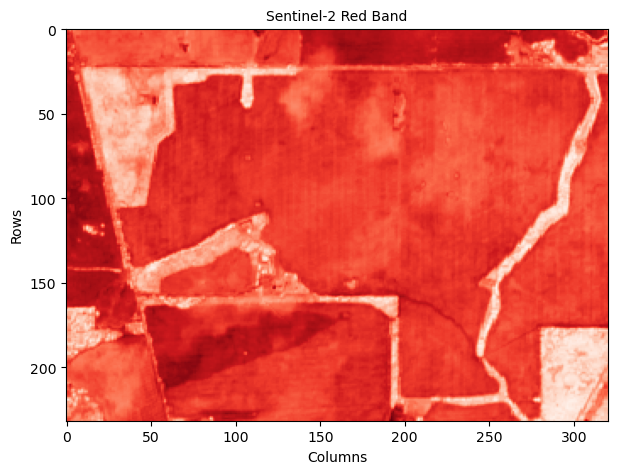

In [146]:
# Plot the red band
plt.figure(figsize=(7, 7))
plt.xlabel("Columns", fontsize=10)
plt.ylabel("Rows", fontsize=10)
plt.title("Sentinel-2 Red Band", fontsize=10)
plt.imshow(red_band, cmap="Reds")
plt.show()

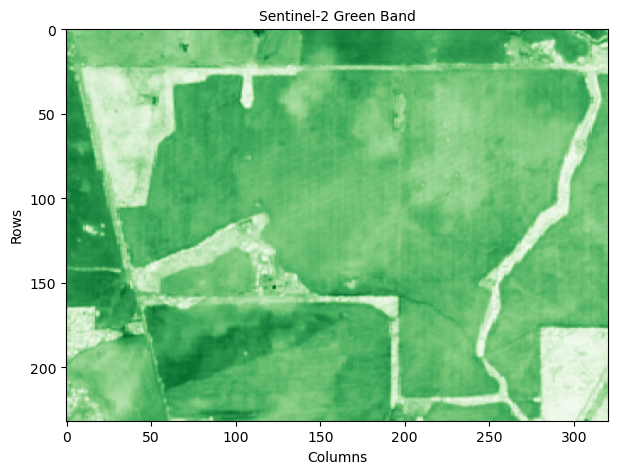

In [147]:
# Plot the green band
plt.figure(figsize=(7, 7))
plt.xlabel("Columns", fontsize=10)
plt.ylabel("Rows", fontsize=10)
plt.title("Sentinel-2 Green Band", fontsize=10)
plt.imshow(green_band, cmap="Greens")
plt.show()

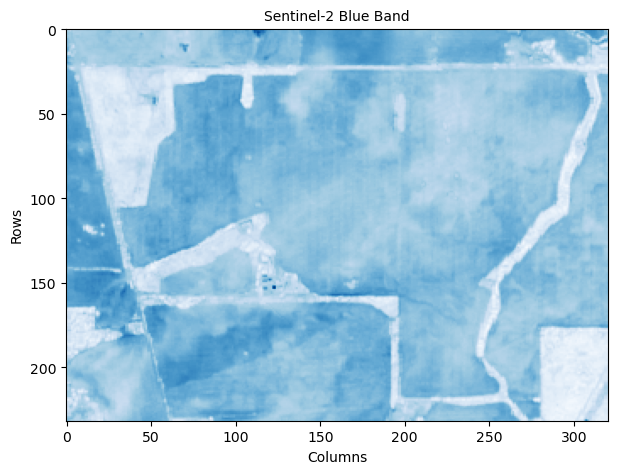

In [148]:
# Plot the Blue band
plt.figure(figsize=(7, 7))
plt.xlabel("Columns", fontsize=10)
plt.ylabel("Rows", fontsize=10)
plt.title("Sentinel-2 Blue Band", fontsize=10)
plt.imshow(blue_band, cmap="Blues")
plt.show()

#### Colour

A particular colour is defined by the intensity of light in different parts of the visible spectrum (e.g. yellow is a mixture of light in red and green wavelengths).

Colour is represented by combinations (addition) of red, green, and blue light. Red, green, and blue are primary colours and combine to form white. An absence of red, green, and blue is black. Secondary colours can be formed by the addition of primary colours of varying intensities (e.g. yellow is the addition of red and green, magenta is the addition of red and blue, and cyan is the addition of green and blue). 

Computer displays consist of red, green, and blue sub-pixels, which when activated with different intensities, are perceived as different colours. The range of colours that can be displayed on a computer display is called the gamut. Colour in computer programs is represented as a three byte hexadecimal number with byte 1 corresponding to red, byte 2 corresponding to green, and byte 3 corresponding to blue. Each byte can take the range of 0 to 255 in decimal. 0 indicates the absence of a colour and 255 indicates saturation of that colour:

* white: 255 255 255
* black: 0 0 0
* red: 255 0 0 
* green: 0 255 00
* blue: 0 0 255

![Additive and subtractive colour models (source: CRCSI (2017))](https://github.com/data-analysis-3300-3003/figs/raw/main/week-2-colour-models-crcsi.png)

Computer displays represent colour through varying the intensity of sub-pixel displays of red, green, and blue light. Variability in data values in multiband raster can be visualised by relating data values in one band to the intensity of one of the primary colours on the computer display. Visualising a multiband raster in this way creates an additive RGB or colour composite image - it is called a composite image because each pixel is a composite of red, green, and blue light.

Above we rendered the red, green, and blue band reflectance from the Sentinel-2 image separately. However, if we combine these reflectance measures into a composite image (e.g. where red reflectance is represented by sub-pixel intensity of red light) we can create a true colour image as if we were looking down on the Earth's surface with our eyes.

The `imshow()` function can take a multiband NumPy `ndarray` and returns an RGB image.

Above, we `read()` bands 4, 3, and 2 from the GeoTIFF file into NumPy `ndarray` referenced by `rgb`. Band 4 corresponds to red reflectance in Sentinel-2 images, band 3 corresponds to green reflectance, and band 2 corresponds to blue reflectance. We can pass `rgb` into the `imshow()` function to generate an RGB image of the field.

We can check that `rgb` has three bands by printing its `shape` property.

In [149]:
print(f"The shape of rgb is {rgb.shape}")

The shape of rgb is (3, 232, 321)


If we check the `imshow()` <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html" target="_blank">docs</a> we can see that it expects a NumPy `ndarray` where the bands (or channels as they are sometimes called with images) is the final axis. numpy has a `moveaxis()` function where can move the bands dimension to the last axis position before plotting.

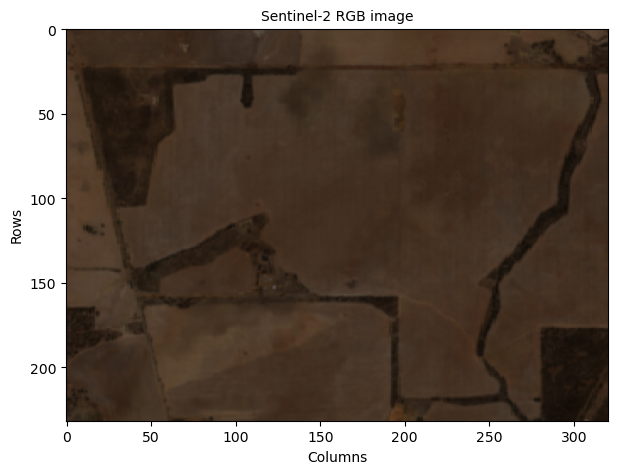

In [150]:
# Plot the RGB image
plt.figure(figsize=(7, 7))
plt.xlabel("Columns", fontsize=10)
plt.ylabel("Rows", fontsize=10)
plt.title("Sentinel-2 RGB image", fontsize=10)
plt.imshow(np.moveaxis(rgb, 0, 2))
plt.show()